### Juan Pablo Fonseca Correa - 138263

In [2]:
# importar librerías y leer la base de datos
import pandas as pd
import numpy as np
from scipy import sparse
from sys import maxint
from math import pow
from __future__ import division
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('reglin3.csv') # leo la bd 

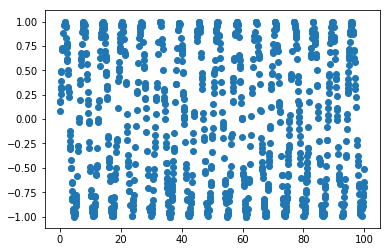

In [3]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.show()

In [4]:
# separar en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)

c:\users\juanpa~1\desktop\env1\python~1\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
re = linear_model.LinearRegression()
re.fit(X_train,Y_train)
Y_predict = re.predict(X_test)

In [6]:
# Muestro las w's
print 'Pendiente: \n', re.coef_[0] # w1
print 'Ordenada al origen: \n', re.intercept_ # w0

Pendiente: 
-0.00176335198516
Ordenada al origen: 
0.0566776007453


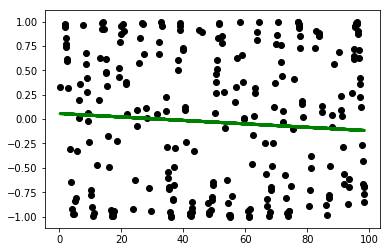

In [7]:
# Para la gráfica
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_predict, color='green', linewidth=3)
plt.show()

In [20]:
# ERROR USANDO EL TEST. Así ves qué tan bien se comporta tu modelo con respecto al test
# def error(w0, w1):
#     y = w0 + w1*X_test
#     errores = [pow(y.values[i][0]-Y_test.values[i],2) for i in range(0,len(Y_test.values))]
#     error = sum(errores)
#     return error

# ERROR USANDO EL TRAIN. Aquí sí se ve que JUSTO le pega al mínimo
def error(w0, w1):
    # ojo: uso el test para ver qué tan bien aproxima al mínimo del error del TEST
    # pero igual también deberías hacerlo con el train para ver que esa sí JUSTO le pega al mínimo
    y = w0 + w1*X_train
    errores = [pow(y.values[i][0]-Y_train.values[i],2) for i in range(0,len(Y_train.values))]
    error = sum(errores)
    return error

In [21]:
x = np.linspace(-0.2, 0.35, 41, endpoint=True) # w0
y = np.linspace(-1, 1, 41, endpoint=True) # w1
z = [[error(i,j) for i in x] for j in y]
print "El error que da el método es {0}".format(error(re.intercept_,re.coef_[0]))

El error que da el método es 373.227243105


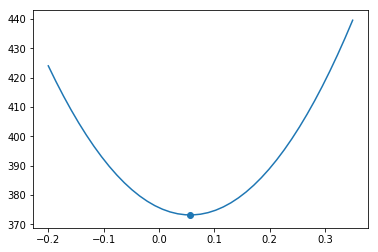

In [22]:
# graficar el error, dejando fijo w0
z1 = [error(i,re.coef_[0]) for i in x]
plt.plot(x,z1)
plt.scatter(re.intercept_,error(re.intercept_,re.coef_[0]))
plt.show()

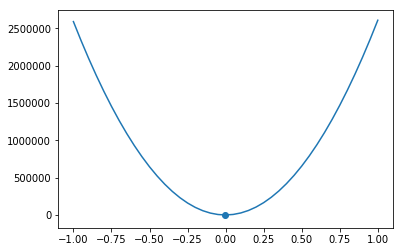

In [23]:
# graficar el error, dejando fijo w1
z2 = [error(re.intercept_,j) for j in y]
plt.plot(y,z2)
plt.scatter(re.coef_[0],error(re.intercept_,re.coef_[0]))
plt.show()

#### efectivamente las w's que te da el método están en el mínimo
#### sin embargo, viendo los datos, es obvio que esto no sigue una tendencia lineal y que habría que usar otra técnica (o transformar los datos)